Import packages and set paths

In [1]:
import os
import sys
import emc2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib as mpl
import pandas as pd
import numpy as np
import xarray as xr
import cftime
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap

# Navigate to my EMC2 project data directory
os.chdir('/g/data/jk72/ck4840/projects/emc2/data/')
# Check current project data directory
print("Project data directory:", os.getcwd())

Project data directory: /g/data/jk72/ck4840/projects/emc2/data


ACCESS candidate dates:
2017-11-05,
2017-11-18,
2017-11-22,
2017-12-30,
2018-01-02,
2018-02-01,
2018-02-02,
2018-02-15,
2018-02-16,
2018-02-19,
2018-02-24

UM focus week dates:
2018-02-01 through 2018-02-07 (inclusive)

MPL

In [2]:
# Load MPL data
MPL = xr.open_dataset('marcus_lidar/20180202_MARCUS_OC_AP_120sec_v4.nc')
# Set Time and Altitude as coordinates
MPL = MPL.set_coords(['Time', 'Altitude'])
MPL

<xarray.Dataset>
Dimensions:                          (x: 720, y: 1001)
Coordinates:
    Time                             (x) |S19 ...
    Altitude                         (y) float32 ...
Dimensions without coordinates: x, y
Data variables: (12/20)
    Fog_Or_Low_Cloud                 (x) float32 ...
    Calibrated_Copol_Backscatter     (y, x) float32 ...
    Calibrated_Crosspol_Backscatter  (y, x) float32 ...
    Calibrated_Raman_Backscatter     (y, x) float32 ...
    Lidar_Copol_Signal               (y, x) float32 ...
    Lidar_Crosspol_Signal            (y, x) float32 ...
    ...                               ...
    ERA_N2_Molecular_Num_Density     (y, x) float32 ...
    ARM_Ceilometer_First_CBH         (x) float32 ...
    ARM_Ceilometer_Second_CBH        (x) float32 ...
    ARM_Ceilometer_Third_CBH         (x) float32 ...
    ARM_Ceilometer_Detection_Status  (x) float32 ...
    BoM RMAN lidar                   |S19 ...

In [3]:
# Create MPL data variables to use
MPL_time_strings = [str(time, 'utf-8') for time in MPL['Time'].values]
MPL_time = pd.to_datetime(MPL_time_strings, format='%H:%M:%S %d/%m/%Y')
MPL_time = mdates.date2num(MPL_time)
MPL_altitude = MPL['Altitude']*1000
MPL_total_backscatter = 10**MPL['Calibrated_Copol_Backscatter'] + 10**MPL['Calibrated_Crosspol_Backscatter']
MPL_depolarisation_ratio = MPL['Depolarisation_Ratio']

In [4]:
# Print test values for the MPL total backscatter
MPL_total_backscatter_test = MPL_total_backscatter.values
MPL_total_backscatter_test[np.isinf(MPL_total_backscatter_test)] = np.nan
print(np.nanmax(MPL_total_backscatter_test))
print(np.nanmin(MPL_total_backscatter_test))

# Print test values for the MPL depolarisation ratio
MPL_depolarisation_ratio_test = MPL_depolarisation_ratio
# MPL_depolarisation_ratio_test[np.isinf(MPL_depolarisation_ratio_test)] = np.nan
print(np.nanmax(MPL_depolarisation_ratio_test))
print(np.nanmin(MPL_depolarisation_ratio_test))

0.00065110053
4.809369e-10
804.4675
6.309916e-08


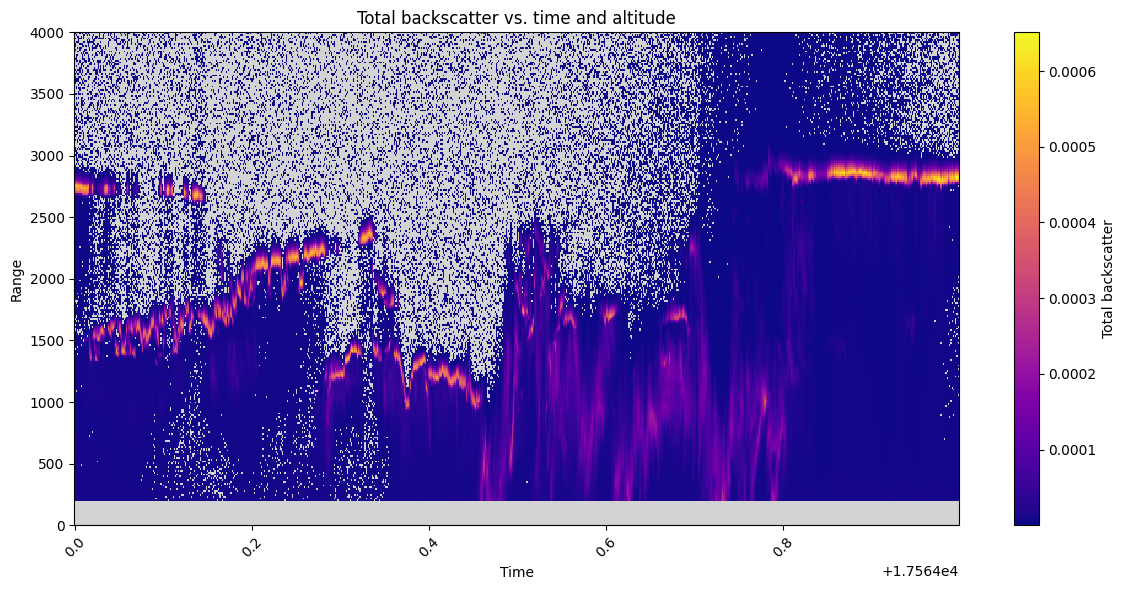

In [5]:
# Plot MPL total backscatter data

# Create a meshgrid for time and range
MPL_time_mesh, MPL_altitude_mesh = np.meshgrid(MPL_time, MPL_altitude)

# Create the plot
plt.figure(figsize=(12, 6))

# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')

# Create a pcolormesh plot
pcm = plt.pcolormesh(MPL_time_mesh, MPL_altitude_mesh, MPL_total_backscatter, cmap='plasma', shading='auto')

plt.colorbar(pcm, label='Total backscatter')
plt.xlabel('Time')
plt.ylabel('Range')
plt.title('Total backscatter vs. time and altitude')

plt.ylim(0,4000)
plt.xticks(rotation=45)
plt.tight_layout()
MARCUS_backscatter = plt.gcf()
MARCUS_backscatter.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/lidar/MARCUS_backscatter_20180202.png', dpi=200)
plt.show()

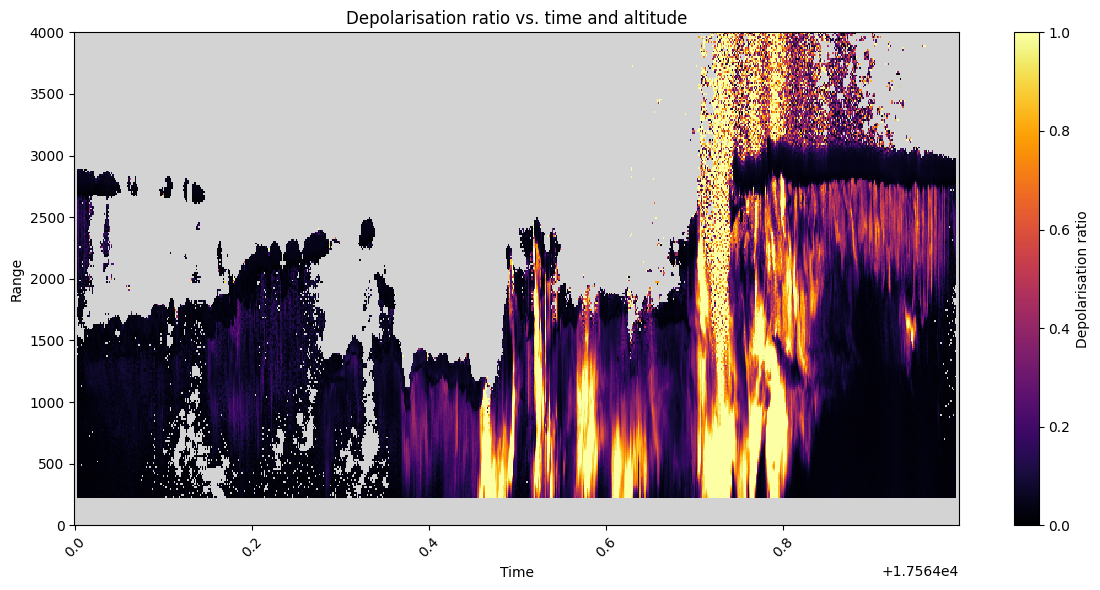

In [6]:
# Plot MPL depolarisation ratio data

# Create a meshgrid for time and range
MPL_time_mesh, MPL_altitude_mesh = np.meshgrid(MPL_time, MPL_altitude)

# Create the plot
plt.figure(figsize=(12, 6))

# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')

# Create a pcolormesh plot
pcm = plt.pcolormesh(MPL_time_mesh, MPL_altitude_mesh, MPL_depolarisation_ratio, cmap='inferno', shading='auto', vmin = 0, vmax = 1)

plt.colorbar(pcm, label='Depolarisation ratio')
plt.xlabel('Time')
plt.ylabel('Range')
plt.title('Depolarisation ratio vs. time and altitude')

plt.ylim(0,4000)
plt.xticks(rotation=45)
plt.tight_layout()
MARCUS_depol = plt.gcf()
MARCUS_depol.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/lidar/MARCUS_depol_20180202.png', dpi=200)
plt.show()

MWACR

In [8]:
# Load MWACR data
MWACR = xr.open_dataset('marcus_radar/mararsclwacr1kolliasM1.c1.20180202.000000.nc')
MWACR

<xarray.Dataset>
Dimensions:                      (time: 17280, height: 602, layer: 10)
Coordinates:
  * time                         (time) object 0006-11-01 08:45:36 ... 0006-1...
  * height                       (height) float32 226.8 256.8 ... 1.824e+04
  * layer                        (layer) int32 1 2 3 4 5 6 7 8 9 10
Data variables: (12/25)
    base_time                    datetime64[ns] ...
    time_offset                  (time) object ...
    qc_time                      (time) int32 ...
    reflectivity                 (time, height) float32 ...
    reflectivity_best_estimate   (time, height) float32 ...
    mean_doppler_velocity        (time, height) float32 ...
    ...                           ...
    qc_cloud_layer_top_height    (time, layer) int32 ...
    cloud_mask_95ghz_kollias     (time, height) float64 ...
    missing_data_flag            (time) float64 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    alt                          (time) float32 ...
Attributes: (12/17)
    description:              ARSCL-like product for the ARM Mobile Facility ...
    author:                   Pavlos Kollias and Karen Johnson
    date:                      2007
    institute:                Brookhaven National Laboratory
    process_version:          $State:vap-arsclwacr1kollias-1.0-matlabR2012a-x...
    command_line:             Start_Wacr -d 20180202 -s mar-f M1
    ...                       ...
    doi:                      10.5439/1097547
    input_files_description:  A string consisting of the datastream(s), datas...
    input_files_num:          3
    input_files:              marceilM1.b1.20180202.000005.nc, marmwacrM1.a1....
    qc_standards_version:     1.0
    history:                  created by user troyan on machine cypher at 05-...

In [9]:
# Create MWACR variables to use
MWACR_time = MWACR['time']
MWACR_time = mdates.date2num(MWACR_time)
MWACR_altitude = MWACR['height']
MWACR_reflectivity = MWACR['reflectivity']

Number of MWACR_time_mesh rows: 602
Number of MWACR_time_mesh columns: 17280
Number of MWACR_altitude_mesh rows: 602
Number of MWACR_altitude_mesh columns: 17280
Number of MWACR_reflectivity rows: 17280
Number of MWACR_reflectivity columns: 602


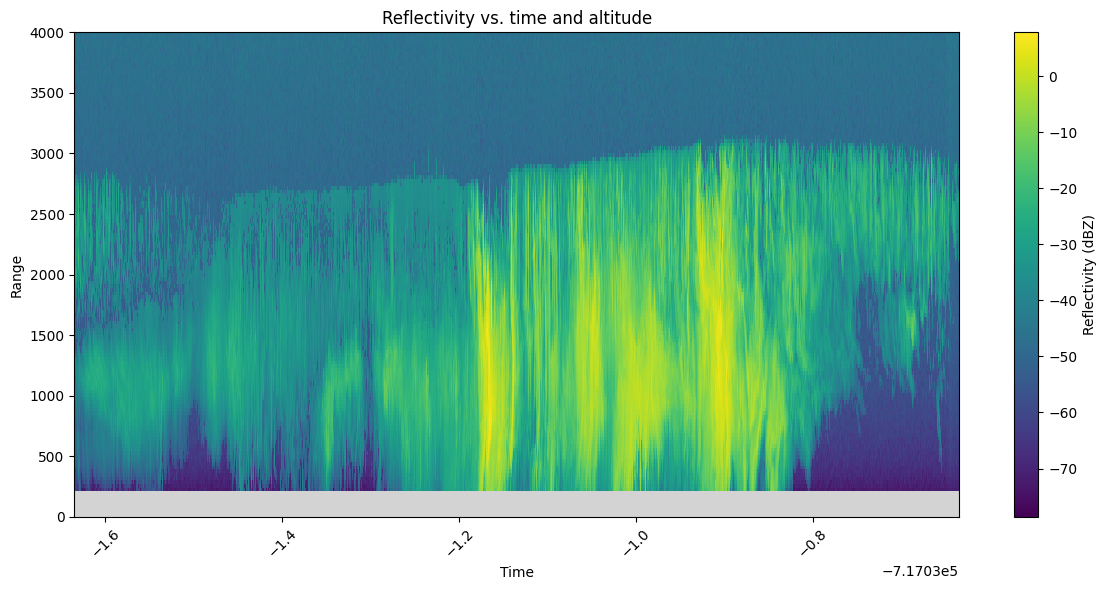

In [10]:
# Instrument data plotting - MWACR

# Create a meshgrid for time and range
MWACR_time_mesh, MWACR_altitude_mesh = np.meshgrid(MWACR_time, MWACR_altitude)

num_rows = MWACR_time_mesh.shape[0]
print("Number of MWACR_time_mesh rows:", num_rows)
num_columns = MWACR_time_mesh.shape[1]
print("Number of MWACR_time_mesh columns:", num_columns)

num_rows = MWACR_altitude_mesh.shape[0]
print("Number of MWACR_altitude_mesh rows:", num_rows)
num_columns = MWACR_altitude_mesh.shape[1]
print("Number of MWACR_altitude_mesh columns:", num_columns)

num_rows = MWACR_reflectivity.shape[0]
print("Number of MWACR_reflectivity rows:", num_rows)
num_columns = MWACR_reflectivity.shape[1]
print("Number of MWACR_reflectivity columns:", num_columns)

# Create the plot
plt.figure(figsize=(12, 6))

# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')

# Create a pcolormesh plot
pcm = plt.pcolormesh(MWACR_time_mesh, MWACR_altitude_mesh, MWACR_reflectivity.T, cmap='viridis')

plt.colorbar(pcm, label='Reflectivity (dBZ)')
plt.xlabel('Time')
plt.ylabel('Range')
plt.ylim(0,4000)
plt.title('Reflectivity vs. time and altitude')

plt.xticks(rotation=45)
plt.tight_layout()
MARCUS_reflectivity = plt.gcf()
MARCUS_reflectivity.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/radar/MARCUS_reflectivity_20180202.png', dpi=200)
plt.show()

Merged lidar-radar

In [11]:
# Load merged product data
lidar_radar_merged = xr.open_dataset('marcus_merged_lidar_radar/LIDAR-RADAR_merged.20180207.nc', decode_times = False)
# Set Time and Altitude as coordinates
# MPL = MPL.set_coords(['Time', 'Altitude'])
lidar_radar_merged

<xarray.Dataset>
Dimensions:               (hour: 1440, height: 1001, status: 3)
Coordinates:
  * hour                  (hour) float32 0.0 0.01667 0.03333 ... 23.97 23.98
  * height                (height) float32 0.007495 0.02248 ... 14.98 15.0
    status                (hour) float32 ...
Data variables: (12/14)
    Fog_Or_Low_Cloud      (hour) float32 ...
    rcldmask              (height, hour) float32 ...
    lcldmask              (height, hour) float32 ...
    cld_mask              (height, hour) float32 ...
    cld_phase             (height, hour) float32 ...
    copol_backscatter     (height, hour) float32 ...
    ...                    ...
    T                     (height, hour) float32 ...
    P                     (height, hour) float32 ...
    reflectivity          (height, hour) float32 ...
    doppler               (height, hour) float32 ...
    cld_nlayer            (status, hour) float64 ...
    cld_cover_type        (status, height, hour) float32 ...

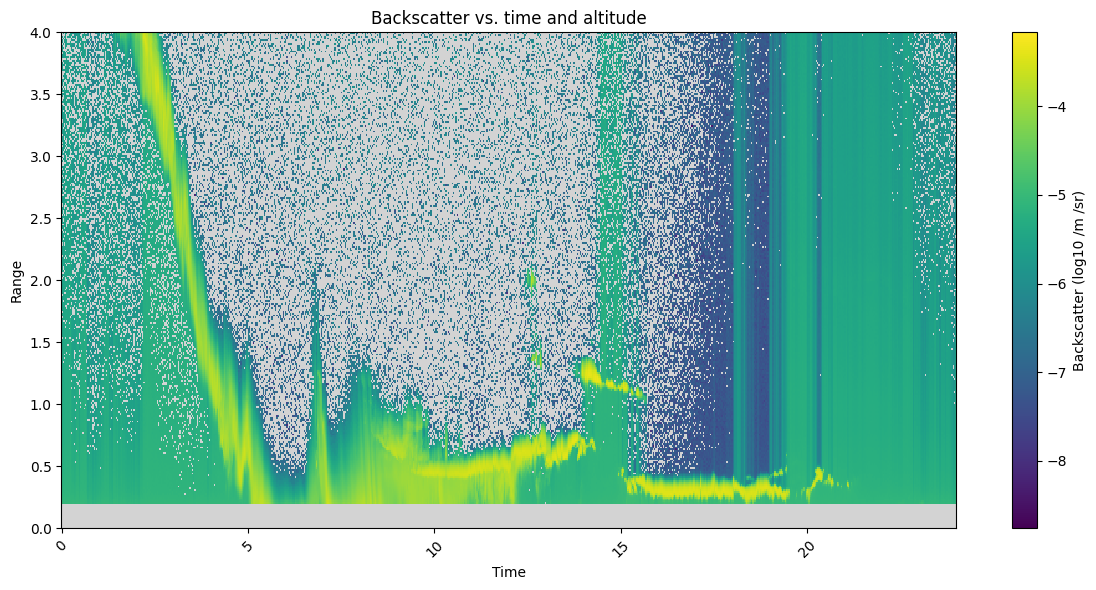

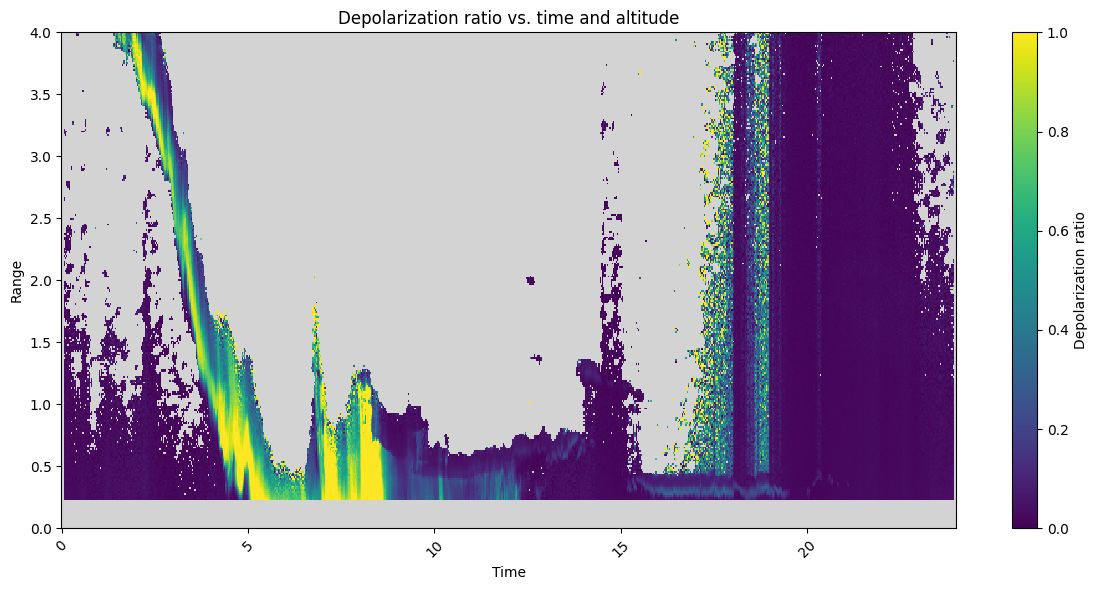

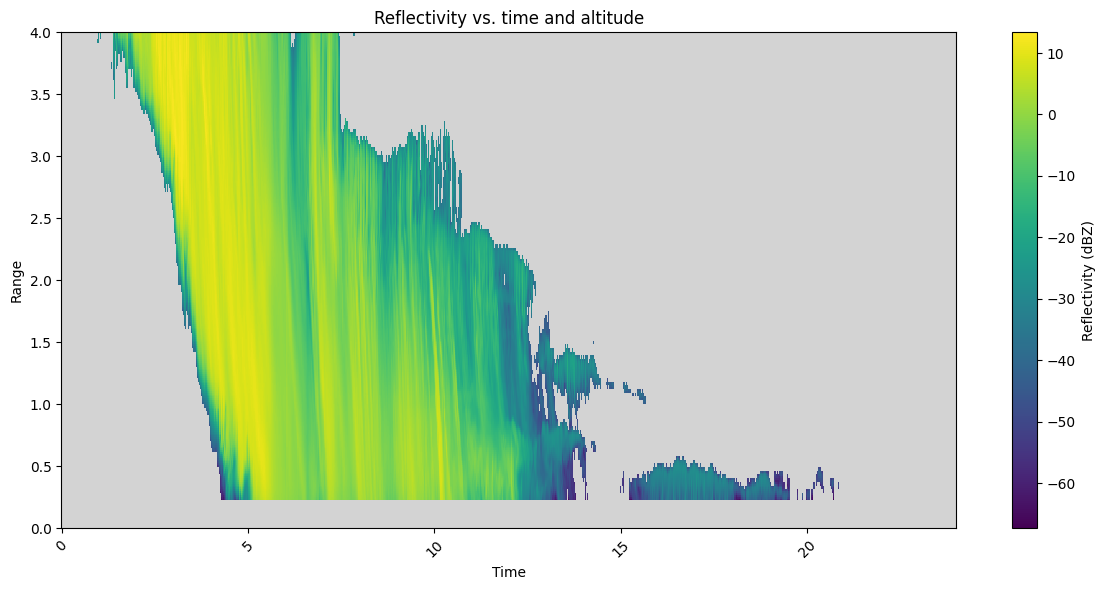

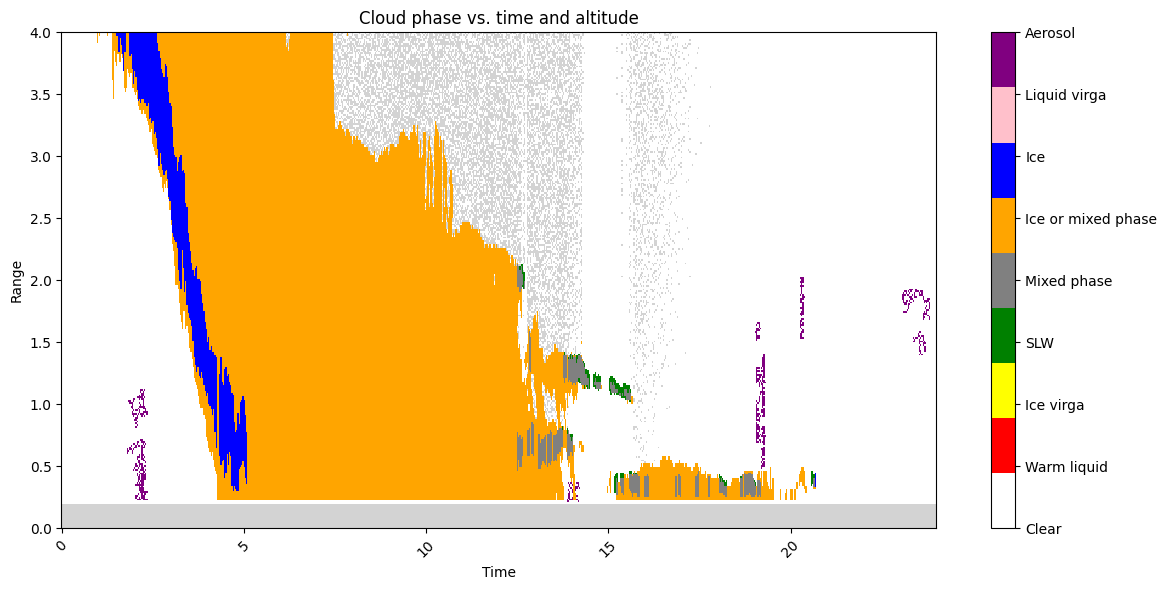

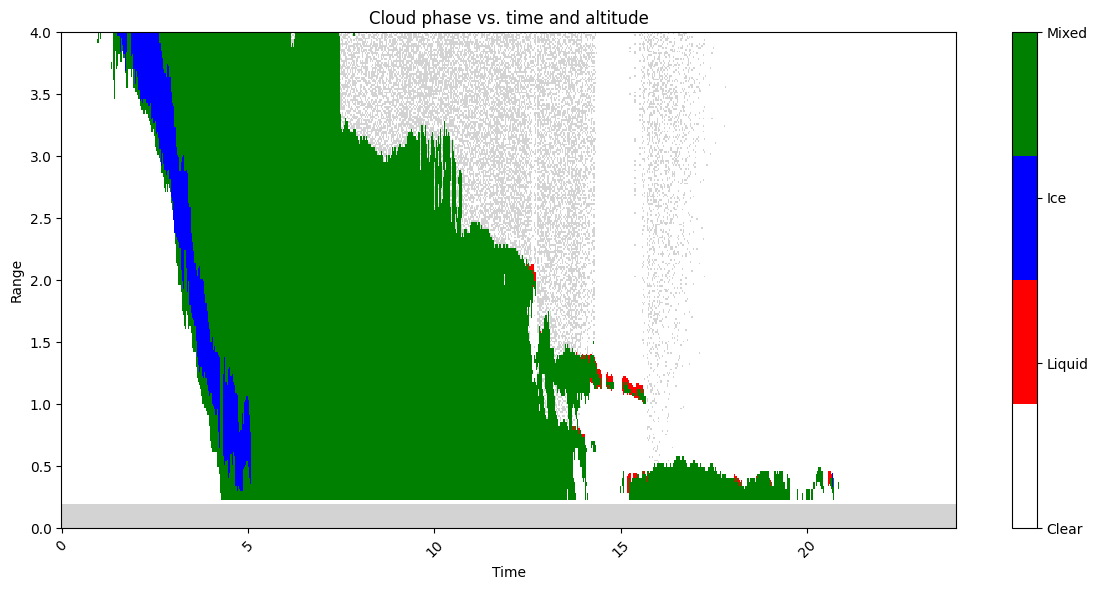

In [12]:
# Create merged product data variables to use
merged_hour = lidar_radar_merged['hour']
merged_height = lidar_radar_merged['height']
merged_backscatter = np.log10(10**lidar_radar_merged['copol_backscatter'] + 10**lidar_radar_merged['crosspol_backscatter'])
merged_depolarization_ratio = lidar_radar_merged['depolarization_ratio']
merged_reflectivity = lidar_radar_merged['reflectivity']
merged_cloud_phase = lidar_radar_merged['cld_phase']
# Create a copy of merged_cloud_phase to modify
merged_cloud_phase_mod = np.copy(merged_cloud_phase)
# Apply the rules to modify the values in 'merged_cloud_phase_mod'
merged_cloud_phase_mod[np.isin(merged_cloud_phase, [0, 8])] = 0
merged_cloud_phase_mod[np.isin(merged_cloud_phase, [1, 3, 7])] = 1
merged_cloud_phase_mod[np.isin(merged_cloud_phase, [2, 6])] = 2
merged_cloud_phase_mod[np.isin(merged_cloud_phase, [4, 5])] = 3

# Instrument data plotting

# Create a meshgrid for time and range
merged_hour_mesh, merged_height_mesh = np.meshgrid(merged_hour, merged_height)

# Create the backscatter plot
plt.figure(figsize=(12, 6))
# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')
# Create a pcolormesh plot
pcm = plt.pcolormesh(merged_hour_mesh, merged_height_mesh, merged_backscatter, cmap='viridis')
# Set plot labels, limits, and layout
plt.colorbar(pcm, label='Backscatter (log10 /m /sr)')
plt.xlabel('Time')
plt.ylabel('Range')
plt.ylim(0,4)
plt.title('Backscatter vs. time and altitude')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show the plot
merged_backscatter = plt.gcf()
merged_backscatter.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/merged_lidar_radar/merged_backscatter_20180207.png', dpi=200)
# plt.show()

# Create the depolarization ratio plot
plt.figure(figsize=(12, 6))
# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')
# Create a pcolormesh plot
pcm = plt.pcolormesh(merged_hour_mesh, merged_height_mesh, merged_depolarization_ratio, cmap='viridis', vmin = 0, vmax = 1)
# Set plot labels, limits, and layout
plt.colorbar(pcm, label = 'Depolarization ratio')
plt.xlabel('Time')
plt.ylabel('Range')
plt.ylim(0,4)
plt.title('Depolarization ratio vs. time and altitude')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show the plot
merged_depolarization_ratio = plt.gcf()
merged_depolarization_ratio.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/merged_lidar_radar/merged_depolarization_ratio_20180207.png', dpi=200)
plt.show()

# Create the reflectivity plot
plt.figure(figsize=(12, 6))
# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')
# Create a pcolormesh plot
pcm = plt.pcolormesh(merged_hour_mesh, merged_height_mesh, merged_reflectivity, cmap='viridis')
# Set plot labels, limits, and layout
plt.colorbar(pcm, label='Reflectivity (dBZ)')
plt.xlabel('Time')
plt.ylabel('Range')
plt.ylim(0,4)
plt.title('Reflectivity vs. time and altitude')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show the plot
merged_reflectivity = plt.gcf()
merged_reflectivity.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/merged_lidar_radar/merged_reflectivity_20180207.png', dpi=200)
plt.show()

# Create the cloud phase plot
plt.figure(figsize=(12, 6))
# Define custom colors for each phase
colors = ['white', 'red', 'yellow', 'green', 'grey', 'orange', 'blue', 'pink', 'purple']
# Define corresponding phase labels
phase_labels = ['Clear', 'Warm liquid', 'Ice virga', 'SLW', 'Mixed phase',
                'Ice or mixed phase', 'Ice', 'Liquid virga', 'Aerosol']
# Create a ListedColormap with custom colors
cmap = ListedColormap(colors)
# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')
# Create a pcolormesh plot
pcm = plt.pcolormesh(merged_hour_mesh, merged_height_mesh, merged_cloud_phase, cmap = cmap)
# Set colorbar ticks and labels
cbar = plt.colorbar(pcm, ticks = range(9))
cbar.ax.set_yticklabels(phase_labels)
# Set plot labels, limits, and layout
# plt.colorbar(pcm, label='Cloud phase')
plt.xlabel('Time')
plt.ylabel('Range')
plt.ylim(0,4)
plt.title('Cloud phase vs. time and altitude')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show the plot
merged_cloud_phase = plt.gcf()
merged_cloud_phase.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/merged_lidar_radar/merged_cloud_phase_20180207.png', dpi=200)
plt.show()

# Create the cloud phase plot
plt.figure(figsize=(12, 6))
# Define custom colors for each phase
colors_mod = ['white', 'red', 'blue', 'green']
# Define corresponding phase labels
phase_labels_mod = ['Clear', 'Liquid', 'Ice', 'Mixed']
# Create a ListedColormap with custom colors
cmap_mod = ListedColormap(colors_mod)
# Set the entire plot background color to grey
plt.gca().set_facecolor('lightgrey')
# Create a pcolormesh plot
pcm = plt.pcolormesh(merged_hour_mesh, merged_height_mesh, merged_cloud_phase_mod, cmap = cmap_mod)
# Set colorbar ticks and labels
cbar = plt.colorbar(pcm, ticks = range(4))
cbar.ax.set_yticklabels(phase_labels_mod)
# Set plot labels, limits, and layout
# plt.colorbar(pcm, label='Cloud phase')
plt.xlabel('Time')
plt.ylabel('Range')
plt.ylim(0,4)
plt.title('Cloud phase vs. time and altitude')
plt.xticks(rotation=45)
plt.tight_layout()
# Save and show the plot
merged_cloud_phase_mod = plt.gcf()
merged_cloud_phase_mod.savefig('/g/data/jk72/ck4840/projects/emc2/figs/marcus/merged_lidar_radar/merged_cloud_phase_mod_20180207.png', dpi=200)
plt.show()